# Understanding PCA

PCA is done using following steps:
- [ 1 - Building Covariance Matrix](#1)
- [ 2 - Calculating Eigenvalues and Eigenvectors](#2)
- [ 3 - Projecting on Eigenvector with Largest Eigenvalue](#3)
- [ 4 - Compiling Everything with Visualization](#4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<a name='1'></a>
## 1 - Building Covariance Matrix

Building Covariance Matrix gives intuition about how spread out data is.

In [18]:
def compute_covariance_matrix(X):
  X_centered = X - np.mean(X,axis=0)
  cov_matrix = np.cov(X_centered.T)
  return cov_matrix, X_centered

<a name='2'></a>
## 2 - Calculating Eigenvalues and Eigenvectors

They help in identifying the principal component where data gets projected on.

In [19]:
def sorted_eigen(cov_matrix):
  eigen_vals,eigen_vecs = np.linalg.eig(cov_matrix)
  sorted_indices = np.argsort(eigen_vals)[::-1]
  return eigen_vals[sorted_indices],eigen_vecs[:,sorted_indices]

<a name='3'></a>
## 3 - Projecting on Eigenvector with Largest Eigenvalue

This function helps to project point on the principal component.

In [20]:
def project_data(X_centered,principal_vector):
  return X_centered @ principal_vector

<a name='4'></a>
## 4 - Compiling Everything with Visualization

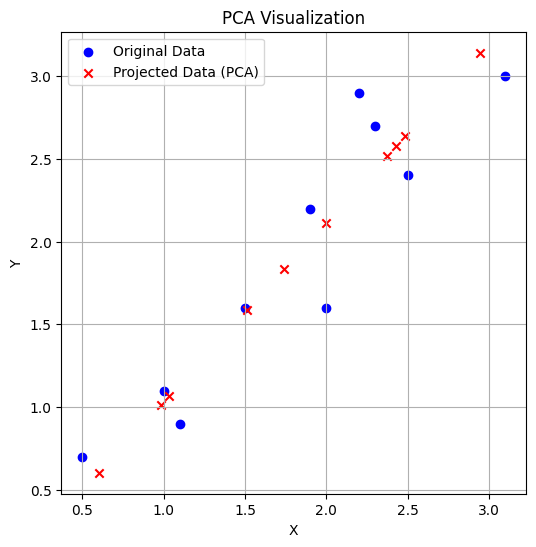

In [21]:
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

cov_matrix, X_centered = compute_covariance_matrix(X)

eigen_vals,eigen_vecs = sorted_eigen(cov_matrix)

principal_vector = eigen_vecs[:,0]

projected_1d = project_data(X_centered,principal_vector)
projected_2d = np.outer(projected_1d,principal_vector) + np.mean(X,axis = 0)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], label='Original Data', color='blue')
plt.scatter(projected_2d[:, 0], projected_2d[:, 1], label='Projected Data (PCA)', color='red', marker='x')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('PCA Visualization')
plt.legend()
plt.grid(True)
plt.show()